In [ ]:
from moviepy.editor import VideoFileClip

# Load video file
video = VideoFileClip("uploads/video_WordPress Blog & n8n Automation for Beginners Step-by-Step Guide.mp4")

# Extract audio
audio = video.audio

# Save audio to file (e.g., mp3 or wav)
audio.write_audiofile("output_audio.mp3")

print("Audio extracted successfully!")


In [1]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="nebius",
    api_key=os.getenv("HF_TOKEN"),
)

result = client.feature_extraction(
    "Today is a sunny day and I will get some ice cream.",
    model="Qwen/Qwen3-Embedding-8B",
)

d:\Slay-Canvas\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
print(len(result[0]))

4096


In [7]:
import os
from huggingface_hub import InferenceClient
from dotenv import load_dotenv
load_dotenv()


client = InferenceClient(
    provider="hf-inference",
    api_key=os.getenv("HF_TOKEN"),
)

result = client.sentence_similarity(
    {
    "source_sentence": "That is a happy person",
    "sentences": [
        "That is a happy dog",
        "That is a very happy person",
        "Today is a sunny day"
    ]
},
    model="google/embeddinggemma-300m",
)

TypeError: InferenceClient.sentence_similarity() missing 1 required positional argument: 'other_sentences'

In [1]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

completion = client.chat.completions.create(

  model="mistralai/mistral-7b-instruct:free",
  messages=[
    {
      "role": "user",
      "content": "What is the meaning of life?"
    }
  ]
)

print("Chat Completion Response:")
print(completion.choices[0].message.content)


AuthenticationError: Error code: 401 - {'error': {'message': 'User not found.', 'code': 401}}

In [14]:

import os
import time
from openai import OpenAI
from openai import OpenAIError

# Load key from environment
API_KEY = "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"
if not API_KEY:
    raise SystemExit("Set OPENROUTER_API_KEY environment variable before running.")

# Create client pointing to OpenRouter
client = OpenAI(base_url="https://openrouter.ai/api/v1", api_key=API_KEY)

def list_models():
    try:
        models = client.models.list()
        print("Available models (sample):")
        # print a few model ids
        for m in models.data[:20]:
            print(" -", m.id)
    except OpenAIError as e:
        print("Failed to list models:", type(e).__name__, str(e))

def chat_with_model(model_id="openai/gpt-5-nano", prompt="What is the meaning of life?"):
    max_retries = 5
    for attempt in range(max_retries):
        try:
            resp = client.chat.completions.create(
                model=model_id,
                messages=[{"role":"user", "content": prompt}],
                max_tokens=256,
            )
            text = resp.choices[0].message.content
            return text

        except OpenAIError as e:
            # Print the exception details for debugging
            print(f"Attempt {attempt+1} - API error:", type(e).__name__, str(e))

            # handle rate-limit / capacity style errors (status 429)
            # The OpenAI client raises OpenAIError; the message often contains '429' or 'rate limit'
            if attempt < max_retries - 1:
                wait = 2 ** attempt
                print(f"Retrying in {wait} seconds...")
                time.sleep(wait)
                continue
            else:
                raise

if __name__ == "__main__":
    print("Listing models (to see what's available for your key)...")
    list_models()

    print("\nCalling chat completion...")
    try:
        out = chat_with_model(
            model_id="mistralai/mistral-small-3.1-24b-instruct:free",  # change to a paid/non-free variant if needed
            prompt="What is the meaning of life?"
        )
        print("\nModel response:\n", out)
    except Exception as e:
        print("Final error calling model:", type(e).__name__, str(e))
        print("If it's a 401: check your key. If it's a 429: capacity is exceeded for that model — try another model or retry later.")


Listing models (to see what's available for your key)...
Available models (sample):
 - qwen/qwen3-coder-flash
 - qwen/qwen3-coder-plus
 - arcee-ai/afm-4.5b
 - opengvlab/internvl3-78b
 - qwen/qwen3-next-80b-a3b-thinking
 - qwen/qwen3-next-80b-a3b-instruct
 - meituan/longcat-flash-chat
 - qwen/qwen-plus-2025-07-28
 - qwen/qwen-plus-2025-07-28:thinking
 - nvidia/nemotron-nano-9b-v2:free
 - nvidia/nemotron-nano-9b-v2
 - openrouter/sonoma-dusk-alpha
 - openrouter/sonoma-sky-alpha
 - qwen/qwen3-max
 - moonshotai/kimi-k2-0905
 - bytedance/seed-oss-36b-instruct
 - deepcogito/cogito-v2-preview-llama-109b-moe
 - deepcogito/cogito-v2-preview-deepseek-671b
 - stepfun-ai/step3
 - qwen/qwen3-30b-a3b-thinking-2507

Calling chat completion...

Model response:
 The meaning of life is a philosophical question that has been debated for centuries, and it doesn't have one definitive answer as it can vary greatly depending on personal beliefs, religious or spiritual views, and philosophical persuasions. Her

In [4]:
import requests

# Replace with your own API key from https://deepai.org
API_KEY = "71181287-5930-43a6-b4b5-71624d804080"

url = "https://api.deepai.org/api/text2img"
headers = {
    "api-key": API_KEY
}
data = {
    "text": "A futuristic cityscape at sunset, neon lights, cyberpunk style"
}

response = requests.post(url, headers=headers, data=data)

if response.status_code == 200:
    result = response.json()
    print("Generated Image URL:", result["output_url"])
else:
    print("Error:", response.status_code, response.text)


Error: 401 {"status": "Out of API credits - please enter payment info in your dashboard: https://deepai.org/dashboard"}


Image (base64): 

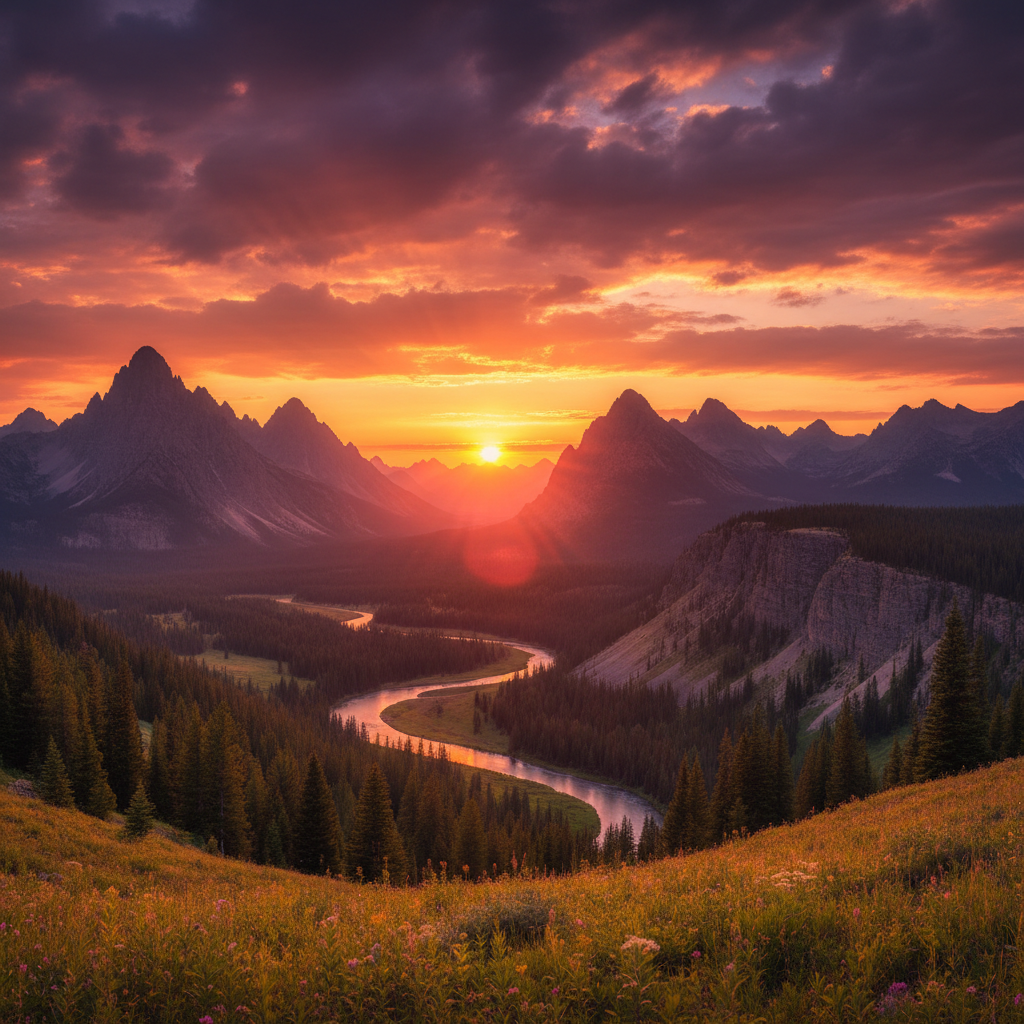

In [4]:
import requests

API_KEY = "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"
url = "https://openrouter.ai/api/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": "google/gemini-2.5-flash-image-preview",
    "messages": [
        {
            "role": "user",
            "content": "Generate a beautiful sunset over mountains"
        }
    ],
    "modalities": ["image", "text"]
}

response = requests.post(url, headers=headers, json=payload)
result = response.json()
if result.get("choices"):
    message = result["choices"][0]["message"]
    if message.get("images"):
        for img in message["images"]:
            print("Image (base64):", img["image_url"]["url"])


In [ ]:
import requests
import base64
from io import BytesIO
from PIL import Image

API_KEY = "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"
url = "https://openrouter.ai/api/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": "google/gemini-2.5-flash-image-preview",
    "messages": [
        {
            "role": "user",
            "content": "Generate a beautiful sunset over mountains"
        }
    ],
    "modalities": ["image", "text"],
    "max_tokens": 2000  # Reduce from default 8192 to something you can afford
}

response = requests.post(url, headers=headers, json=payload)
result = response.json()

print(result)  # Print the entire response for debugging
if result.get("choices"):
    message = result["choices"][0]["message"]

    # Images are inside message["content"]
    for part in message.get("content", []):
        if part["type"] == "image_url":
            img_url = part["image_url"]["url"]

            if img_url.startswith("data:image"):
                # Base64 encoded image
                img_data = base64.b64decode(img_url.split(",", 1)[1])
                image = Image.open(BytesIO(img_data))
                image.show()  # opens the image in your default viewer
            else:
                # Hosted image URL
                print("Image hosted at:", img_url)


{'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 4000 tokens, but can only afford 3605. To increase, visit https://openrouter.ai/settings/credits and upgrade to a paid account', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_326rc30ZZDI6yBJq1E20bNxCiZb'}


In [6]:
from openai import OpenAI
import base64
from PIL import Image
from io import BytesIO

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key="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",
)

response = client.chat.completions.create(
    model="google/gemini-2.5-flash-image-preview",
    messages=[
        {"role": "user", "content": "Generate a beautiful sunset over mountains"}
    ],
    extra_body={"modalities": ["image", "text"]},  # Use extra_body for OpenRouter
    max_tokens=2000  # Limit tokens to avoid credit issues
)

# Debug: Print the entire response to see the structure
print("Full response:", response)
print("Message content:", response.choices[0].message.content)

# The response structure varies by model - check if content is a string or list
message = response.choices[0].message
content = message.content

if isinstance(content, str):
    print("Response is text only:", content)
elif isinstance(content, list):
    # Handle list of content parts
    for part in content:
        if isinstance(part, dict) and part.get("type") == "image_url":
            img_url = part["image_url"]["url"]
            if img_url.startswith("data:image"):
                # Base64 encoded image
                img_data = base64.b64decode(img_url.split(",", 1)[1])
                image = Image.open(BytesIO(img_data))
                image.show()
            else:
                print("Image hosted at:", img_url)
        elif isinstance(part, dict) and part.get("type") == "text":
            print("Text content:", part.get("text"))
else:
    print("Unexpected content format")

APIStatusError: Error code: 402 - {'error': {'message': 'This request requires more credits, or fewer max_tokens. You requested up to 2000 tokens, but can only afford 507. To increase, visit https://openrouter.ai/settings/credits and upgrade to a paid account', 'code': 402, 'metadata': {'provider_name': None}}, 'user_id': 'user_326rc30ZZDI6yBJq1E20bNxCiZb'}

In [5]:
from openai import OpenAI
import base64
from PIL import Image
from io import BytesIO

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key="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",
)

response = client.chat.completions.create(
    model="google/gemini-2.5-flash-image-preview",
    messages=[
        {"role": "user", "content": "Generate a beautiful sunset over mountains"}
    ],
    modalities=["image", "text"]
)

# Extract and display image
message = response.choices[0].message
if hasattr(message, "images") and message.images:
    img_data = message.images[0].image_url["url"]
    image_bytes = base64.b64decode(img_data.split(",", 1)[1])
    image = Image.open(BytesIO(image_bytes))
    image.show()
else:
    print("No image was generated.")


AttributeError: 'dict' object has no attribute 'image_url'

In [6]:
from openai import OpenAI
import base64
from PIL import Image
from io import BytesIO

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key="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",
)

response = client.chat.completions.create(
    model="google/gemini-2.5-flash-image-preview",
    messages=[
        {"role": "user", "content": "Generate a beautiful sunset over mountains"}
    ],
    extra_body={"modalities": ["image", "text"]}  # 👈 must go inside extra_body
)

# The generated image(s) will be in the message["content"]
message = response.choices[0].message

for part in message["content"]:
    if part["type"] == "image_url":
        img_url = part["image_url"]["url"]

        # Some models return base64 data URIs, some return hosted URLs.
        if img_url.startswith("data:image"):
            # Extract base64 after the comma
            image_bytes = base64.b64decode(img_url.split(",", 1)[1])
            image = Image.open(BytesIO(image_bytes))
            image.show()
        else:
            print("Image hosted at:", img_url)


TypeError: 'ChatCompletionMessage' object is not subscriptable

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

completion = client.chat.completions.create(

  extra_body={},
  model="google/gemini-2.5-flash-image-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is in this image?"
        },
      ]
    }
  ]
)
print(completion.choices[0].message.content)

BadRequestError: Error code: 400 - {'error': {'message': 'Failed to extract 1 image(s)', 'code': 400, 'metadata': {'provider_name': None}}}

In [9]:

import requests
import base64

API_KEY = "sk-FLuquGARHPRuTzG5w2Ols9NqSOTwkvxPS2KfIVp2DPxLqRor"

url = "https://api.stability.ai/v2beta/stable-image/generate/core"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Accept": "application/json"  
}

files = {
    "prompt": (None, """
                Futuristic business consulting scene with executives and 
               AI strategists analyzing holographic data. Focus on identifying 
               high-impact AI opportunities and measurable business value. Clean, professional, high-tech style.
               """),
    "output_format": (None, "png")
}

response = requests.post(url, headers=headers, files=files)

if response.status_code == 200:
    result = response.json()
    b64_img = result["image"]  # base64 string
    img_bytes = base64.b64decode(b64_img)
    with open("output.png", "wb") as f:
        f.write(img_bytes)
    print("✅ Image saved as output.png")
else:
    print("Error:", response.status_code, response.text)

✅ Image saved as output.png


In [ ]:
import requests
import base64

API_KEY = "sk-FLuquGARHPRuTzG5w2Ols9NqSOTwkvxPS2KfIVp2DPxLqRor"

url = "https://api.stability.ai/v2beta/stable-image/generate/core"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Accept": "application/json"
}

files = {
    "prompt": (None, """
        generate something similar to this image,
    """),
    "output_format": (None, "png"),
    # attach your reference image here
    "image": ("reference.jpeg", open("reference.jpeg", "rb"), "image/jpeg"),
    # strength controls how much to follow the reference (0.0–1.0)
    "strength": (None, "0.6")
}

response = requests.post(url, headers=headers, files=files)

if response.status_code == 200:
    result = response.json()
    b64_img = result["image"]  # base64 string
    img_bytes = base64.b64decode(b64_img)
    with open("output.png", "wb") as f:
        f.write(img_bytes)
    print("✅ Image saved as output.png")
else:
    print("Error:", response.status_code, response.text)

✅ Image saved as output.png


In [ ]:
import requests
import base64

API_KEY = "sk-FLuquGARHPRuTzG5w2Ols9NqSOTwkvxPS2KfIVp2DPxLqRor"  # keep your key safe

url = "https://api.stability.ai/v2beta/stable-image/generate/core"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Accept": "application/json"
}

files = files = {
    "prompt": (None, "A dog in white color"),
    "output_format": (None, "png"),
    "aspect_ratio": (None, "2:3"),   # lowest is 1344x768
    "quality": (None, "low")          # reduce quality
}

response = requests.post(url, headers=headers, files=files)

if response.status_code == 200:
    result = response.json()
    b64_img = result["image"]  # base64 string
    img_bytes = base64.b64decode(b64_img)
    with open("output.png", "wb") as f:
        f.write(img_bytes)
    print("✅ Low-res image saved as output.png")
else:
    print("Error:", response.status_code, response.text)


Error: 402 {"errors":["You lack sufficient credits to make this request.  Please purchase more credits at https://platform.stability.ai/account/credits and try again."],"id":"03cebf41ad280d5539af5a24b6b5da7f","name":"payment_required"}


In [14]:
from langchain_community.document_loaders import YoutubeLoader
import yt_dlp

def fetch_video_and_audio(url: str):
    # Step 1: Use yt-dlp to download video + audio
    ydl_opts = {
        "format": "bestvideo+bestaudio/best",
        "merge_output_format": "mp4",
        "outtmpl": "%(title)s.%(ext)s",  # Save with video title
    }
    print("🔹 Downloading video & audio...")
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    print("✅ Download complete!")

    # Step 2: Use LangChain to get video transcript & metadata
    print("🔹 Loading transcript and metadata...")
    loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
    docs = loader.load()
    for doc in docs:
        print(f"\nTitle: {doc.metadata.get('title')}")
        print(f"Channel: {doc.metadata.get('author')}")
        print(f"Transcript snippet: {doc.page_content[:300]}...\n")

if __name__ == "__main__":
    youtube_url = input("Enter YouTube URL: ")
    fetch_video_and_audio(youtube_url)

🔹 Downloading video & audio...
[youtube] Extracting URL: https://www.youtube.com/watch?v=RlZneDmi29w
[youtube] RlZneDmi29w: Downloading webpage
[youtube] RlZneDmi29w: Downloading tv simply player API JSON
[youtube] RlZneDmi29w: Downloading tv client config
[youtube] RlZneDmi29w: Downloading tv player API JSON
[info] RlZneDmi29w: Downloading 1 format(s): 303+251


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


DownloadError: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error

In [17]:
from pytube import YouTube
import os

def download_youtube_video(url, output_path="downloads"):
    try:
        # Create output directory if it doesn't exist
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        
        # Initialize YouTube object
        yt = YouTube(url)
        
        # Print video title
        print(f"Downloading: {yt.title}")
        
        # Download video (highest resolution available)
        video_stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
        if video_stream:
            print(f"Downloading video in {video_stream.resolution}")
            video_stream.download(output_path=output_path, filename_prefix="video_")
            print("Video downloaded successfully!")
        else:
            print("No suitable video stream found")
        
        # Download audio
        audio_stream = yt.streams.filter(only_audio=True, file_extension='mp4').first()
        if audio_stream:
            print("Downloading audio")
            audio_stream.download(output_path=output_path, filename_prefix="audio_")
            print("Audio downloaded successfully!")
        else:
            print("No suitable audio stream found")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    # Example YouTube video URL
    video_url = input("Enter YouTube video URL: ")
    download_youtube_video(video_url)

An error occurred: HTTP Error 400: Bad Request


In [13]:
from pytubefix import YouTube
import os

def download_youtube_video(url, output_path="downloads"):
    try:
        # Create output directory if it doesn't exist
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        
        # Initialize YouTube object
        yt = YouTube(url)
        
        # Print video title
        print(f"Downloading: {yt.title}")
        
        # Download video (highest resolution available, progressive stream)
        video_stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
        if video_stream:
            print(f"Downloading video in {video_stream.resolution}")
            video_stream.download(output_path=output_path, filename_prefix="video_")
            print("Video downloaded successfully!")
        else:
            print("No suitable video stream found")
        
        # Download audio
        audio_stream = yt.streams.filter(only_audio=True, file_extension='mp4').first()
        if audio_stream:
            print("Downloading audio")
            audio_stream.download(output_path=output_path, filename_prefix="audio_")
            print("Audio downloaded successfully!")
        else:
            print("No suitable audio stream found")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Suggestions:")
        print("- Ensure the YouTube URL is valid and the video is publicly accessible.")
        print("- Update pytubefix: pip install --upgrade pytubefix")
        print("- Try a different video to rule out restrictions.")

if __name__ == "__main__":
    # Example YouTube video URL
    video_url = input("Enter YouTube video URL: ")
    download_youtube_video(video_url)

Downloading: SOFI TUKKER & John Summit - Sun Came Up | Extended Remix | 15 MINUTES
Video downloaded successfully!
Audio downloaded successfully!


In [15]:
import instaloader
import os
from urllib.parse import urlparse

def get_instagram_media(post_url):
    # Initialize Instaloader
    loader = instaloader.Instaloader(
        download_pictures=True,
        download_videos=True,
        download_video_thumbnails=False,
        download_comments=False,
        save_metadata=False
    )

    try:
        # Extract shortcode from URL
        parsed_url = urlparse(post_url)
        path_parts = parsed_url.path.strip('/').split('/')
        
        # Handle different URL formats
        shortcode = None
        if 'p' in path_parts:
            shortcode = path_parts[path_parts.index('p') + 1]
        elif 'reel' in path_parts:
            shortcode = path_parts[path_parts.index('reel') + 1]
        elif 'reels/audio' in path_parts:
            shortcode = path_parts[path_parts.index('audio') + 1]
        else:
            print("Invalid Instagram URL. Please provide a valid post or reel URL.")
            return

        # Load the post
        post = instaloader.Post.from_shortcode(loader.context, shortcode)

        # Determine media type and download
        if post.is_video:
            print("Downloading video...")
            loader.download_post(post, target="downloads")
            print(f"Video saved in 'downloads' folder.")
            
            # Extract audio (if needed)
            video_file = next((f for f in os.listdir('downloads') if f.endswith('.mp4')), None)
            if video_file:
                print("Extracting audio from video...")
                os.system(f'ffmpeg -i downloads/{video_file} -vn -acodec mp3 downloads/audio_{video_file}.mp3')
                print(f"Audio saved as downloads/audio_{video_file}.mp3")
        else:
            print("Downloading image...")
            loader.download_post(post, target="downloads")
            print(f"Image saved in 'downloads' folder.")

    except Exception as e:
        print(f"Error: {str(e)}")
        print("Possible reasons: Private post, invalid URL, or network issue.")

# Example usage
post_url = "https://www.instagram.com/p/DOZHb2dEZCe/?utm_source=ig_web_copy_link&igsh=YW0yb3FiNnV6M2Vq"  # Replace with your Instagram post/reel URL
get_instagram_media(post_url)

JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]


downloads\2025-09-09_19-00-12_UTC.jpg [Funeral prayers of Major Adna…] 
Image saved in 'downloads' folder.


In [25]:
from document_processor import DocumentProcessor

doc_proc = DocumentProcessor()

doc_proc.extract_text_from_pdf("D:\slaycanvas\AI in Healthcare Proposal.pdf")

'RESEARCH PROPOSAL: AI IN HEALTHCARE - PREDICTIVE\nANALYTICS FOR HEART DISEASES\nINTRODUCTION\nThe integration of Artificial Intelligence (AI) into healthcare has opened new\nfrontiers for disease prevention, diagnosis, and treatment. Heart diseases remain a\nleading cause of mortality worldwide, necessitating innovative approaches for early\ndetection and management. Predictive analytics, powered by AI, offers a promising\navenue to identify individuals at high risk of developing heart conditions, enabling\ntimely interventions and personalized care. This proposal outlines a research\nproject focused on developing and evaluating AI-driven predictive models for heart\ndiseases.\nLITERATURE REVIEW\nExisting research has explored various machine learning algorithms, including\nSupport Vector Machines (SVMs), Random Forests, and Deep Learning models, for\npredicting heart disease. Studies have utilized diverse datasets, often incorporating\nclinical, demographic, and lifestyle factors. Wh

In [ ]:
from transformers import pipeline

# Load Whisper pipeline (you can change model size: "tiny", "base", "small", "medium", "large")
transcriber = pipeline("automatic-speech-recognition", model="openai/whisper-base", device=0, return_timestamps=True)  # Use device=0 for GPU, device=-1 for CPU

def transcribe_audio(audio_path: str) -> str:
    """
    Transcribes speech from an audio file using Whisper model.

    Args:
        audio_path (str): Path to the audio file (.wav, .mp3, etc.)

    Returns:
        str: Transcribed text
    """
    result = transcriber(audio_path)
    return result["text"]

Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]
Device set to use cpu


In [ ]:
transcript = transcribe_audio("downloads/video_WordPress Blog & n8n Automation for Beginners Step-by-Step Guide.mp4")
print(transcript)

In [ ]:
transcriber = pipeline("automatic-speech-recognition", model="openai/whisper-base", device=0)

In [5]:
from web_extractor import WebExtractor

extractor = WebExtractor()

extractor._extract_twitter("https://x.com/elonmusk/status/1967098157193719931")

2025-09-15 20:23:58,337 - INFO - ====== WebDriver manager ======
2025-09-15 20:23:59,106 - INFO - Get LATEST chromedriver version for google-chrome
2025-09-15 20:23:59,705 - INFO - Get LATEST chromedriver version for google-chrome
2025-09-15 20:24:00,305 - INFO - Driver [C:\Users\LENOVO\.wdm\drivers\chromedriver\win64\140.0.7339.82\chromedriver-win32/chromedriver.exe] found in cache


ExtractedContent(url='https://x.com/elonmusk/status/1967098157193719931', title='Tweet by Elon Musk (@Elon Musk)', content='', images=['https://pbs.twimg.com/amplify_video_thumb/1966909055403806720/img/esryL5GycRe9L4sf.jpg'], videos=['https://abs.twimg.com/images/anniversary-theme.mp4', 'https://abs.twimg.com/videos/grok-4-key-visual.mp4', 'https://abs.twimg.com/images/radar_promo_v2.mp4', 'https://abs.twimg.com/sticky/videos/inapp_light_square_v4.mp4', 'https://abs.twimg.com/sticky/videos/inapp_dim_square_v4.mp4', 'https://abs.twimg.com/sticky/videos/inapp_dark_square_v4.mp4'], metadata={'username': 'Elon Musk', 'display_name': 'Elon Musk', 'retweets': '18K', 'likes': '120K', 'replies': '4.3K'}, extraction_time='2025-09-15T20:24:12.525264', content_type='twitter', success=True, error_message='')

In [ ]:
import requests

# Replace with your Deepgram API Key
DEEPGRAM_API_KEY = ""

# Function to transcribe audio/video from a URL
def transcribe_from_url(media_url: str):
    url = "https://api.deepgram.com/v1/listen"

    headers = {
        "Authorization": f"Token {DEEPGRAM_API_KEY}",
        "Content-Type": "application/json"
    }

    payload = {
        "url": media_url
    }

    response = requests.post(url, headers=headers, json=payload)
    print(response.status_code)
    print(response.text)
    if response.status_code == 200:
        result = response.json()
        # Extract transcript text
        transcript = result['results']['channels'][0]['alternatives'][0]['transcript']
        return transcript
    else:
        print("Error:", response.status_code, response.text)
        return None

def transcribe_from_file(file_path: str):
    url = "https://api.deepgram.com/v1/listen"

    headers = {
        "Authorization": f"Token {DEEPGRAM_API_KEY}",
        "Content-Type": "audio/mp3"  # Change this depending on your file format
    }

    with open(file_path, "rb") as audio:
        response = requests.post(url, headers=headers, data=audio)

    print(response.status_code)
    if response.status_code == 200:
        result = response.json()
        # Extract transcript text
        transcript = result['results']['channels'][0]['alternatives'][0]['transcript']
        return transcript
    else:
        print("Error:", response.status_code, response.text)
        return None
    

if __name__ == "__main__":
    # Example YouTube video (must be direct audio/video link, not webpage URL)
    media_link = "https://www.youtube.com/watch?v=1Jj4T_HKSQE"

    # ⚠️ If you use YouTube, you need to first extract the direct audio URL 
    # using something like pytube or yt-dlp, since Deepgram can’t fetch from
    # YouTube webpage links directly.
    
    print("Transcribing from URL...")
    transcript = transcribe_from_url(media_link)
    print(transcript)
    if transcript:
        print("\n--- Transcript ---\n")
        print(transcript)


Transcribing from URL...
415
{"err_code":"Unsupported Media Type","err_msg":"remote server failed to offer audio data. Content-Type of remote server's response was: text/html; charset=utf-8","request_id":"b53e62da-0bde-4211-a4df-0de274083fc8"}
Error: 415 {"err_code":"Unsupported Media Type","err_msg":"remote server failed to offer audio data. Content-Type of remote server's response was: text/html; charset=utf-8","request_id":"b53e62da-0bde-4211-a4df-0de274083fc8"}
None


In [8]:

def transcribe_from_file(file_path: str):
    url = "https://api.deepgram.com/v1/listen"

    headers = {
        "Authorization": f"Token {DEEPGRAM_API_KEY}",
        "Content-Type": "audio/mp3"  # Change this depending on your file format
    }

    with open(file_path, "rb") as audio:
        response = requests.post(url, headers=headers, data=audio)

    print(response.status_code)
    if response.status_code == 200:
        result = response.json()
        # Extract transcript text
        transcript = result['results']['channels'][0]['alternatives'][0]['transcript']
        return transcript
    else:
        print("Error:", response.status_code, response.text)
        return None
    

if __name__ == "__main__":
    # Example YouTube video (must be direct audio/video link, not webpage URL)
    media_link = "downloads/video_WordPress Blog & n8n Automation for Beginners Step-by-Step Guide.mp4"

    # ⚠️ If you use YouTube, you need to first extract the direct audio URL 
    # using something like pytube or yt-dlp, since Deepgram can’t fetch from
    # YouTube webpage links directly.
    
    print("Transcribing from URL...")
    transcript = transcribe_from_file(media_link)
    print(transcript)
    if transcript:
        print("\n--- Transcript ---\n")
        print(transcript)


Transcribing from URL...
200
so if you're tired of spending hours writing wordpress blog posts from scratch this video is for you because i'm gonna show you how to automate the entire process using ai you're gonna learn how to get started with hosting vps hosting and set up your own self hosted in it in instance to run ai powered wordpress workflows and if you're brand new to all this i know that sounded super tactical but trust me once you get the hang of it you'll be a pro in no time and like i said in this video we're gonna go through how to sign up for a vps hosting plan with hosting we're then gonna install and configure your in innate in account and then build an automated workflow that writes complete wordpress blog posts for you it even automatically publishes the content as a draft on your wordpress blog all you'll need to do is provide a few keywords that is it and this means that you could publish high quality long form articles and minutes instead of hours giving you more t

In [22]:
from services.youtube import download_youtube_video

download_youtube_video("https://www.youtube.com/watch?v=FGGo8LFmbjs&list=RDFGGo8LFmbjs&start_radio=1")

Downloading: Lewis Capaldi - Someone You Loved (Lyrics)
Video downloaded successfully!
Audio downloaded successfully!


In [15]:
import os
import requests
from PIL import Image

def compress_and_save(image_path, output_path="compressed.jpg", target_kb=190):
    """
    Compress an image and save it so its size is <= target_kb.
    Returns the output file path.
    """
    img = Image.open(image_path)

    # Convert RGBA/Palette -> RGB to avoid issues with JPEG
    if img.mode in ("RGBA", "P"):
        img = img.convert("RGB")

    quality = 95
    while True:
        img.save(output_path, format="JPEG", quality=quality, optimize=True)
        size_kb = os.path.getsize(output_path) / 1024

        if size_kb <= target_kb or quality <= 20:
            break
        quality -= 5  # step down quality

    print(f"✅ Saved compressed image at {output_path} ({size_kb:.2f} KB)")
    return output_path


def image_to_text(api_key: str, image_path: str):
    url = "https://api.api-ninjas.com/v1/imagetotext"
    headers = {"X-Api-Key": api_key}

    with open(image_path, "rb") as f:
        files = {"image": f}
        response = requests.post(url, headers=headers, files=files)

    if response.status_code != 200:
        print("Error:", response.status_code, response.text)
        return None

    return response.json()

def extract_text(ocr_result):
    """
    Takes the OCR JSON result from API Ninjas and returns
    only the extracted text as a single string.
    """
    if not ocr_result:
        return ""

    # Collect only the 'text' values
    texts = [item["text"] for item in ocr_result if "text" in item]

    # Join them with spaces
    return " ".join(texts)


if __name__ == "__main__":
    YOUR_API_KEY = "i+9ikadSDn1WuemC9gkymQ==KYlLWXHCxS2vkSIH"
    IMAGE_FILE = "downloads/pic2.png"
    COMPRESSED_FILE = "compressed.jpg"

    # Step 1: compress + save to disk
    compressed_path = compress_and_save(IMAGE_FILE, COMPRESSED_FILE, target_kb=190)

    # Step 2: send compressed file to API Ninjas
    result = image_to_text(YOUR_API_KEY, compressed_path)

    print("OCR result:")
    print(extract_text(result))


✅ Saved compressed image at compressed.jpg (136.87 KB)
OCR result:
Adobe, the Adobe logo, Acrobat, the Acrobat logo, Acrobat Capture, Adobe Garamond, Adobe Intelligent Document Platform, Adobe PDE, Adobe Reader, Adobe Solutions Network, Aldus, Dis- tiller, ePaper, Extreme, FrameMaker, Illustrator, InDesign, Minion, Myriad, PageMaker, Photo- shop, Poetica, PostScript, and XMP are either registered trademarks or trademarks of Adobe Systems Incorporated in the United States and/or other countries. Microsoft and Windows are either registered trademarks or trademarks of Microsoft Corporation in the United States and/or other countries. Apple, Mac, Macintosh, and Power Macintosh are trademarks of Apple Computer, Inc, registered in the United States and other countries. IBM is a registered trademark of IBM Corporation in the United States. Sun is a trademark or registered trademark of Sun Microsys- tems, Inc. in the United States and other countries. UNIX is a registered trademark of The Open

In [23]:
import io
import cv2
import requests
from PIL import Image

def compress_frame_to_bytes(frame, target_kb=190):
    """
    Compress an OpenCV frame into JPEG bytes <= target_kb.
    Returns a BytesIO buffer.
    """
    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    buffer = io.BytesIO()
    quality = 95

    while True:
        buffer.seek(0)
        buffer.truncate(0)
        img.save(buffer, format="JPEG", quality=quality, optimize=True)
        size_kb = buffer.tell() / 1024

        if size_kb <= target_kb or quality <= 20:
            break
        quality -= 5

    buffer.seek(0)
    return buffer


def send_frame_to_api(api_key, frame):
    """
    Compresses a frame and sends it to API Ninjas OCR.
    Returns the OCR JSON result.
    """
    url = "https://api.api-ninjas.com/v1/imagetotext"
    headers = {"X-Api-Key": api_key}

    buffer = compress_frame_to_bytes(frame)

    files = {"image": ("frame.jpg", buffer, "image/jpeg")}
    response = requests.post(url, headers=headers, files=files)

    if response.status_code != 200:
        print(f"Error {response.status_code}: {response.text}")
        return []
    return response.json()


def extract_text(ocr_result):
    """Extract only the text values from OCR API response."""
    return " ".join([item["text"] for item in ocr_result if "text" in item])


def video_to_text(api_key, video_path, frame_interval=30):
    """
    Reads a video and sends every Nth frame to OCR API without saving frames.
    Returns a list of extracted texts.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError("Error opening video file.")

    results = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            ocr_result = send_frame_to_api(api_key, frame)
            text = extract_text(ocr_result)
            print(f"[Frame {frame_count}] OCR Text: {text}")
            results.append({"frame": frame_count, "text": text})

        frame_count += 1

    cap.release()
    return results


if __name__ == "__main__":
    API_KEY = "i+9ikadSDn1WuemC9gkymQ==KYlLWXHCxS2vkSIH"  # Replace with your API Ninjas key
    VIDEO_FILE = "downloads/lyrics2.mp4"

    extracted = video_to_text(API_KEY, VIDEO_FILE, frame_interval=60)

    print("\n✅ Final Collected OCR Results:")
    for r in extracted:
        print(f"Frame {r['frame']}: {r['text']}")


[Frame 0] OCR Text: 
[Frame 60] OCR Text: 
[Frame 120] OCR Text: T
[Frame 180] OCR Text: 
[Frame 240] OCR Text: 
[Frame 300] OCR Text: TG T =8 2
[Frame 360] OCR Text: TIMETFEAR THERE'S NO ONE T0 SAVE ME
[Frame 420] OCR Text: 
[Frame 480] OCR Text: 
[Frame 540] OCR Text: {1 TN 1 A GOT A WAY.OF DRIVING ME CRAZY
[Frame 600] OCR Text: {1 A GOT A WAY OF DRIVING ME CRAZY:
[Frame 660] OCR Text: U GOT A WAY OF DRIVING ME CRAZY:
[Frame 720] OCR Text: 
[Frame 780] OCR Text: 
[Frame 840] OCR Text: 
[Frame 900] OCR Text: 
[Frame 960] OCR Text: 
[Frame 1020] OCR Text: 
[Frame 1080] OCR Text: 
[Frame 1140] OCR Text: LA TR NUMBED ALL THE PAIN
[Frame 1200] OCR Text: I GUESS | KINDA LIKED THE WAY'YOU NUMBED ALL THE PAIN
[Frame 1260] OCR Text: 
[Frame 1320] OCR Text: 
[Frame 1380] OCR Text: 
[Frame 1440] OCR Text: 
[Frame 1500] OCR Text: 
[Frame 1560] OCR Text: 
[Frame 1620] OCR Text: 
[Frame 1680] OCR Text: ) (TR )
[Frame 1740] OCR Text: | WAS GETTING KINDA USED LG
[Frame 1800] OCR Text: 


KeyboardInterrupt: 

In [25]:
ydl_opts = {
                'quiet': True,
                'no_warnings': True,
                'extract_flat': False,
            }

url = "https://www.youtube.com/watch?v=FGGo8LFmbjs&list=RDFGGo8LFmbjs&start_radio=1"

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    print("🔹 Fetching video info...")
    info = ydl.extract_info(url, download=False)
    print("✅ Video info fetched!")
    # Extract thumbnail images
    thumbnails = []
    if 'thumbnails' in info:
        for thumb in info['thumbnails']:
            if 'url' in thumb:
                thumbnails.append(thumb['url'])

🔹 Fetching video info...


KeyboardInterrupt: 

In [26]:
from pytubefix import YouTube

def get_youtube_metadata(url: str):
    yt = YouTube(url)

    metadata = {
        "title": yt.title,
        "author": yt.author,
        "channel_url": yt.channel_url,
        "description": yt.description,
        "publish_date": yt.publish_date.strftime("%Y-%m-%d") if yt.publish_date else None,
        "views": yt.views,
        "length_seconds": yt.length,
        "thumbnail_url": yt.thumbnail_url,
        "keywords": yt.keywords,  # list of tags
        "rating": yt.rating,
    }

    # Stream information (all available audio/video formats)
    streams = []
    for stream in yt.streams:
        streams.append({
            "itag": stream.itag,
            "type": stream.type,         # "audio" or "video"
            "mime_type": stream.mime_type,
            "abr": getattr(stream, "abr", None),  # audio bitrate (if audio)
            "fps": getattr(stream, "fps", None),  # frames per second (if video)
            "resolution": getattr(stream, "resolution", None),  # resolution (if video)
            "filesize_mb": round(stream.filesize / (1024 * 1024), 2) if stream.filesize else None,
            "url": stream.url,  # direct URL to stream (can be huge, use carefully)
        })

    metadata["available_streams"] = streams
    return metadata


if __name__ == "__main__":
    video_url = "https://www.youtube.com/watch?v=fqvRz5u4QJE&list=RDfqvRz5u4QJE&start_radio=1"  # example
    data = get_youtube_metadata(video_url)

    from pprint import pprint
    pprint(data)


{'author': 'SoulLyrics',
 'available_streams': [{'abr': '96kbps',
                        'filesize_mb': 5.12,
                        'fps': 24,
                        'itag': 18,
                        'mime_type': 'video/mp4',
                        'resolution': '360p',
                        'type': 'video',
                        'url': 'https://rr6---sn-2uja-pncy.googlevideo.com/videoplayback?expire=1758079562&ei=6tXJaJbpL7z2xN8PqencgQ4&ip=182.185.87.66&id=o-AOHkuWsrFvO5DZDxDoC41PVQCezgem05-XTwzynulf15&itag=18&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1758057962%2C&mh=Zt&mm=31%2C29&mn=sn-2uja-pncy%2Csn-4wg7lnee&ms=au%2Crdu&mv=m&mvi=6&pl=20&rms=au%2Cau&gcr=pk&initcwndbps=956250&bui=ATw7iSXq8Ru2nYA1M-oXYcDd62FVmWYOIJhDmCDPynkj59xcyIcSAh42g9WZEo3IcNDjLvIgvQ55fwfd&spc=hcYD5SjP1BEGM1OR95ovY2QOwOvkCinM811gxuE49q3223WQ0oTMrqvXHjU&vprv=1&svpuc=1&mime=video%2Fmp4&rqh=1&gir=yes&clen=5366656&ratebypass=yes&dur=261.735&lmt=1743207226540449&mt=1758057467&fvip=2&fexp=5155268

In [1]:
from extractor import Extractor

extractor = Extractor()

print(extractor._extract_twitter("https://x.com/ValentinaForUSA/status/1967664132444045739"))

2025-09-17 02:54:41,210 - INFO - ====== WebDriver manager ======
2025-09-17 02:54:41,861 - INFO - Get LATEST chromedriver version for google-chrome
2025-09-17 02:54:42,029 - INFO - Get LATEST chromedriver version for google-chrome
2025-09-17 02:54:42,181 - INFO - Driver [C:\Users\LENOVO\.wdm\drivers\chromedriver\win64\140.0.7339.82\chromedriver-win32/chromedriver.exe] found in cache


ExtractedContent(url='https://x.com/ValentinaForUSA/status/1967664132444045739', title='Tweet by Valentina Gomez (@Valentina Gomez)', content='We will end Islam in America & Europe \n@TRobinsonNewEra\n \n\n@Keir_Starmer\n is the biggest pedophile protector in History.\n\nAll those rapist muslims can go back to any of their 57 muslim nations.', images=[], videos=[], audio=[], metadata={'username': 'Valentina Gomez', 'display_name': 'Valentina Gomez', 'retweets': '21K', 'likes': '104K', 'replies': '7.2K'}, extraction_time='2025-09-17T02:54:52.397789', content_type='twitter', success=True, error_message='', transcriptions={'text': 'We will end Islam in America & Europe \n@TRobinsonNewEra\n \n\n@Keir_Starmer\n is the biggest pedophile protector in History.\n\nAll those rapist muslims can go back to any of their 57 muslim nations.', 'audio_transcription': '', 'image_transcriptions': []})


In [8]:
import os
import requests

API_KEY = "kyfAyzEum4ciuPJeSpC2EnrwyZayL8EW"  # Set your Mistral API Key in env vars
ENDPOINT = "https://api.mistral.ai/v1/embeddings"

def get_embeddings(inputs, model="mistral-embed"):
    """
    inputs: list of strings (texts or code)
    model: "mistral-embed" or "codestral-embed"
    """
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json",
        "Accept": "application/json",
    }
    json_data = {
        "model": model,
        # Depending on model, optional params like output_dtype, output_dimension are available
        "inputs": inputs
    }
    response = requests.post(ENDPOINT, headers=headers, json=json_data)
    response.raise_for_status()
    return response.json()

def main():
    texts = [
        "This is a test sentence.",
        "Embeddings are powerful for semantic search."
    ]
    embeddings_response = get_embeddings(texts, model="mistral-embed")
    print("Full response:", embeddings_response)
    # Example: extract embedding vectors
    for item in embeddings_response.get("data", []):
        emb = item.get("embedding")
        print("Embedding dimension:", len(emb))
        print("First few values:", emb[:5])

if __name__ == "__main__":
    main()


HTTPError: 422 Client Error: Unprocessable Entity for url: https://api.mistral.ai/v1/embeddings

In [7]:
import os
from mistralai import Mistral

def main():
    api_key = "kyfAyzEum4ciuPJeSpC2EnrwyZayL8EW"
    client = Mistral(api_key=api_key)

    inputs = [
        "Embed this sentence.",
        "Here is another sentence to embed."
    ]
    resp = client.embeddings.create(
        model="mistral-embed",
        inputs=inputs
    )
    # `resp` has data, etc.
    print(resp)
    for d in resp.data:
        print("Embedding vector:", d.embedding[:5])  # first 5 components

if __name__ == "__main__":
    main()


SDKError: API error occurred: Status 429
{"object":"error","message":"Service tier capacity exceeded for this model.","type":"service_tier_capacity_exceeded","param":null,"code":"3505"}

In [6]:
r = requests.get(
    "https://api.mistral.ai/v1/models",
    headers={"Authorization": f"Bearer {API_KEY}"}
)
print(r.status_code, r.text)

401 {"detail":"Unauthorized"}


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

sentences = ["This is a test sentence.", "Embeddings are powerful."]
embeddings = model.encode(sentences)

print("Embedding dimension:", embeddings.shape[1])
print("First vector:", embeddings[0][:10])


d:\slaycanvas\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\slaycanvas\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\LENOVO\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, se

In [1]:
import requests
import json

API_TOKEN = "2903fbbc7893ce39a382eea93a34e4f1d632cb84"
MODEL_NAME = "paraphrase‐multilingual‐mpnet‐base‐v2"  # e.g. 'paraphrase-multilingual-MiniLM-L12-v2'
    
url = f"https://api.nlpcloud.io/v1/{MODEL_NAME}/embeddings"

headers = {
    "Authorization": f"Token {API_TOKEN}",
    "Content-Type": "application/json"
}

data = {
    "sentences": [
        "John Does works for Google.",
        "Janette Doe works for Microsoft.",
        "Janie Does works for NLP Cloud."
    ]
}

response = requests.post(url, headers=headers, data=json.dumps(data))

print("Status code:", response.status_code)
print("Response JSON:", response.json())


Status code: 404


JSONDecodeError: Extra data: line 1 column 5 (char 4)

In [4]:
import os
import requests

# Replace with your real token from https://nlpcloud.com
NLPCLOUD_TOKEN = os.getenv("NLPCLOUD_TOKEN", "2903fbbc7893ce39a382eea93a34e4f1d632cb84")
MODEL_NAME = "paraphrase-multilingual-mpnet-base-v2"  # must be exact from docs

url = f"https://api.nlpcloud.io/v1/{MODEL_NAME}/embeddings"
headers = {
    "Authorization": f"Token {NLPCLOUD_TOKEN}",
    "Content-Type": "application/json"
}

data = {
    "sentences": [
        "John Does works for Google."
    ]
}

response = requests.post(url, headers=headers, json=data)

print("Status code:", response.status_code)
print("Raw response:", response.text)  # 👈 always check this first

try:
    result = response.json()
    print("Parsed JSON:", result)
except Exception as e:
    print("Could not parse JSON:", e)


Status code: 200
Raw response: {"embeddings":[[0.06927306205034256,0.2892701327800751,-0.007209481205791235,0.07894696295261383,0.045376136898994446,-0.04464558884501457,0.14787657558918,-0.04229122772812843,0.224581778049469,-0.08647101372480392,0.016188442707061768,-0.0072684520855546,-0.11121624708175659,0.21208104491233826,0.14336775243282318,0.004875660873949528,-0.04071744158864021,-0.041450582444667816,0.05648273602128029,-0.017673399299383163,-0.042185112833976746,0.028892138972878456,0.05185980349779129,-0.021172266453504562,-0.04833054542541504,-0.052489686757326126,0.03579678386449814,0.03330878168344498,0.12256729602813721,0.2834741175174713,-0.13470792770385742,0.016293363645672798,-0.09840989112854004,0.16721856594085693,0.09190496802330017,0.0712275356054306,0.06709843873977661,0.03805268928408623,-0.01738068088889122,-0.05265206843614578,-0.1552535891532898,0.149717777967453,-0.04043634608387947,0.0692148208618164,-0.09316801279783249,-0.03635488450527191,0.058044601231